In [1]:
import sys
sys.path.append(r'C:\Users\79023\Desktop')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [2]:
image = cv.imread('image.png')

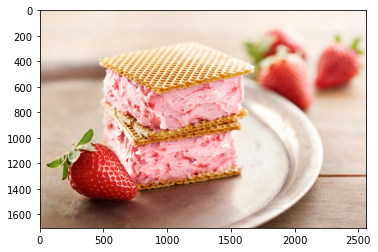

In [3]:
# Использование библиотеки matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(rgb_image)

In [4]:
plt.rcParams["figure.figsize"] = [12, 8]

In [5]:
hsv_image = cv.cvtColor(rgb_image, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image)

In [6]:
import seaborn as sns

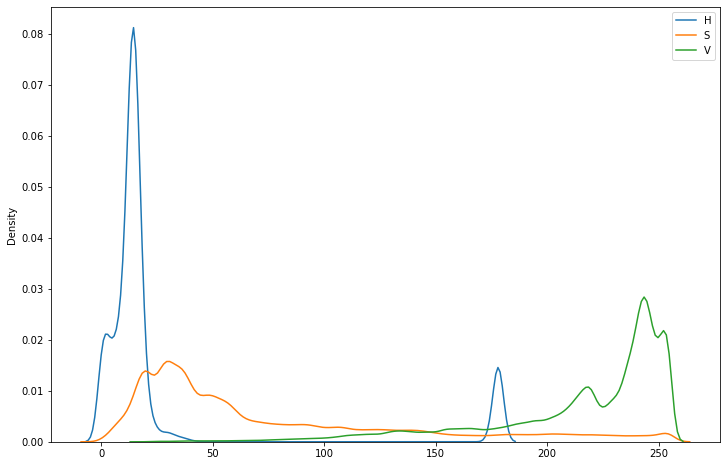

In [7]:
for layer in range(hsv_image.shape[-1]):
	lv = hsv_image[...,layer].flatten()
	sns.kdeplot(lv)
plt.legend(labels=['H', 'S', 'V'])

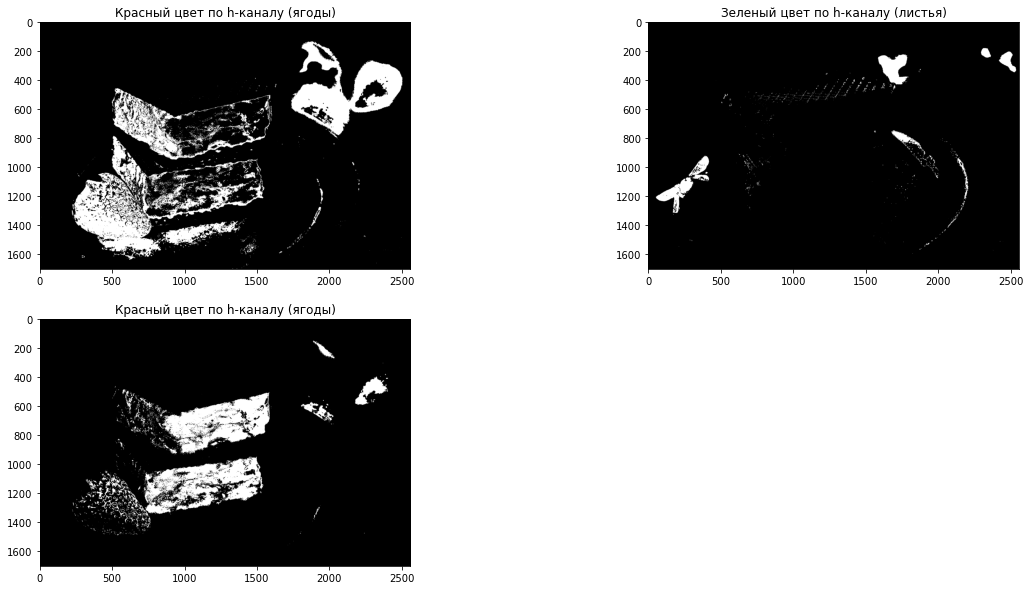

In [8]:
mask_h = cv.inRange(hsv_image[...,0], -10, 5) 
mask_h1 = cv.inRange(hsv_image[...,0], 25, 40)
mask_h2 = cv.inRange(hsv_image[...,0], 170, 190) 

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('Красный цвет по h-каналу (ягоды)')
plt.imshow(mask_h, cmap="gray")
plt.subplot(2, 2, 2)
plt.title('Зеленый цвет по h-каналу (листья)')
plt.imshow(mask_h1, cmap="gray")
plt.subplot(2, 2, 3)
plt.title('Красный цвет по h-каналу (ягоды)')
plt.imshow(mask_h2, cmap="gray")
plt.show()

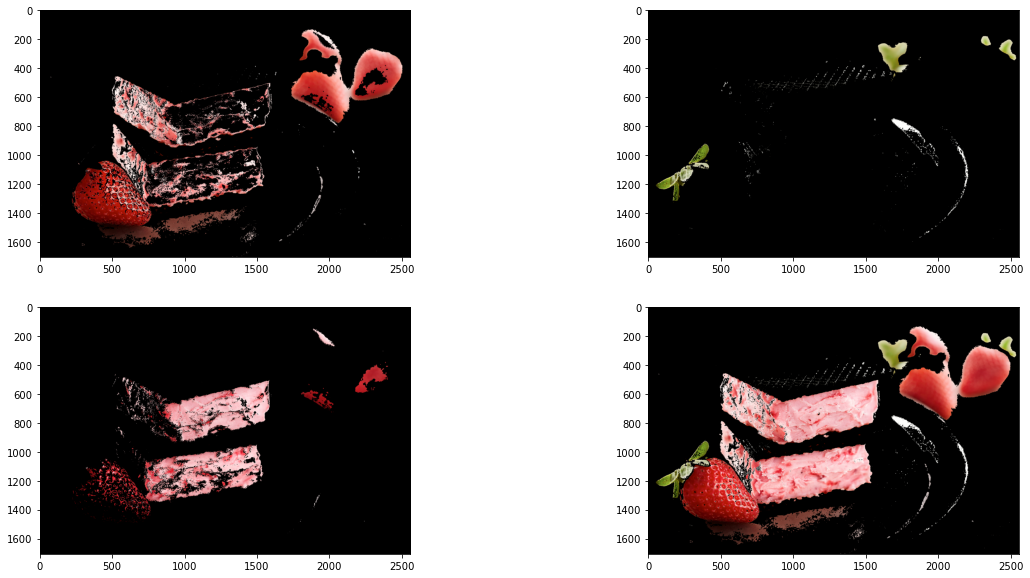

In [9]:
mask_h = cv.inRange(hsv_image[...,0], -10, 5) # 170...190
mask_h1 = cv.inRange(hsv_image[...,0], 25, 40)
mask_h2 = cv.inRange(hsv_image[...,0], 170, 190)
image_mask_h = cv.bitwise_and(rgb_image, rgb_image, mask=mask_h)
image_mask_h1 = cv.bitwise_and(rgb_image, rgb_image, mask=mask_h1)
image_mask_h2 = cv.bitwise_and(rgb_image, rgb_image, mask=mask_h2)
image_after_mask = cv.bitwise_or(image_mask_h, image_mask_h1)
image_after_mask_1 = cv.bitwise_or(image_after_mask, image_mask_h2)

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(image_mask_h, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(image_mask_h1)
plt.subplot(2, 2, 3)
plt.imshow(image_mask_h2)
plt.subplot(2, 2, 4)
plt.imshow(image_after_mask_1)
plt.show()

In [10]:
# Мороженое трудно убрать, потому что скорее всего состоит из этих ягод